# Group 22 : Project 1

Group members: Matthew Beck, Jimmy Draudt, Enmanuel Baez, Nathan Geng, Sam Remmey, Ronit Reddy

## Imports & Data Retrieval

In [ ]:
# command needed to run this notebook in Colab:
! git clone https://www.github.com/DS3001/group22

Cloning into 'group22'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 69 (delta 24), reused 21 (delta 0), pack-reused 0
Receiving objects: 100% (69/69), 7.29 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
# imports and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# read by default 1st sheet of an excel file:
# df = pd.read_excel('result/GSS.xlsx')

# if running in Colab:
df = pd.read_excel('group22/result/GSS.xlsx')

## Summary

Marriage and relationships play a large role in society - influencing peoples’ daily routines, the values they hold, and even their perceived status. However, these variables have been subject to change over the years. Based on data from 2015, it appears that both marriage and divorce are trending downward after experiencing large fluctuations due to both extreme social change (e.g. WWII, rising feminist movement) and gradual change in opinion (Olson). Since the GSS provides a robust set of data for a number of years spanning from 1972 to 2022, our group thought it would be appropriate to closely examine the question of how marital status influences people’s productivity and routines - more specifically the hours they are working each week - at particular points in time. On top of this, to gain a more comprehensive view, variables such as the type of work and the highest level of education earned were examined in regards to relational status as well.

As for our methods, we created separate data frames, grouping survey participants by their eligibility and marital status. We then were able to compare these different participant groups by creating data visualizations with boxplots, scatterplots, histograms, and kernel density plots. These visualizations show that the participants’ workweeks have largely similar times of commitment, with all people regardless of marital status working an average of around 40 hours per week. It is seen that respondents are more likely to work more than 40 hours per week, as opposed to fewer hours; however, there are no visible trends relating average worked hours with marital status. The range variation provides more insight, with participants who have been divorced and are now single having the largest range, while those who divorced and then remarried have the lowest range variation. One interesting relationship is captured in the linear regression plot, which shows that the hours worked in the previous week for divorced respondents is positively correlated with the same variable for their divorced spouse, while there is no such correlation with married respondents and their current spouse. Overall, more research could provide valuable insight into the relationship between one’s relationships and the work that they do.

## Data: Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      72390 non-null  int64 
 1   id_       72390 non-null  int64 
 2   wrkstat   72390 non-null  object
 3   hrs1      72390 non-null  object
 4   hrs2      72390 non-null  object
 5   evwork    72390 non-null  object
 6   wrkslf    72390 non-null  object
 7   marital   72390 non-null  object
 8   divorce   72390 non-null  object
 9   spwrksta  72390 non-null  object
 10  sphrs1    72390 non-null  object
 11  sphrs2    72390 non-null  object
 12  spevwork  72390 non-null  object
 13  spwrkslf  72390 non-null  object
 14  spocc10   72390 non-null  object
 15  spind10   72390 non-null  object
 16  degree    72390 non-null  object
 17  spdeg     72390 non-null  object
 18  ballot    72390 non-null  object
dtypes: int64(2), object(17)
memory usage: 10.5+ MB


Out of the variables provided in the GSS, these were ones that we decided were relevant for our research question:
- **year**: the year in which the participant responded to the survey
- **wrkstat**: the status of labor that the participant holds
- **hrs1**: total number of hours worked last week
- **hrs2**: estimated average number of hours worked per week
- **evwork**: whether or not the participant has ever worked for as long as a year
- **wrkslf**: whether the participant works under an employer, or is self-employed
- **marital**: marital status of the participant
- **divorce**: whether or not the participant has ever been divorced before
- **spwrksta**: the status of labor that the participant’s spouse holds
- **sphrs1**: total number of hours the participant’s spouse worked last week
- **sphrs2**: estimated average number of hours the participant’s spouse works per week
- **spevwork**: whether or not the participant’s spouse has ever worked for as long as a year
- **spwrkslf**: whether the participant’s spouse works under an employer, or is self-employed
- **spocc10**: occupation of the participant’s spouse
- **spind10**: industry of the occupation of the participant’s spouse
- **degree**: highest level of education attained
- **spdeg**: highest level of education attained by the participant’s spouse
- **ballot**: ballot administered to the participant for the survey


Certain variables were selected because they are essential to our research question of how marital status and hours worked per week are related. Other variables were chosen because they provide supplementary data that could possibly be useful in explaining the relationship between the two. We gathered a comprehensive set of variables, cleaned them accordingly, and then narrowed the set down to key variables that we thought would be best to work with. In our view, it was better to have a fully cleaned dataset with a few unused supplementary variables than to have a dataset that is not fully cleaned with variables that might have to be cleaned further down the line if we ever decided to use them.
The process of cleaning and sorting the variables was standard, just making the data more presentable and suitable for visualization. For each variable, there were values that did not provide any substantial information, such as “Inapplicable” or “Do Not Know/Cannot Choose” in **hrs1** and **hrs2**. For these values, we decided to replace them with null values. Also, for variable pairs that were comparing data between the respondent and their spouse, there were certain values that were conveying exactly the same information, but the values themselves were not named properly. So, we decided to replace those values and match them with each other - for example, changing **spdeg**’s “LT HIGH SCHOOL” values to “Less than high school” to match up with the **degree** variable. Lastly, for the **hrs2** variable, the “Full Time”, “Part Time”, and “Unemployed” values seemed out of place, since they were not classified as numeric. So, we assumed that “Full Time” was 40 hours, “Part Time” was 25 hours, and “Unemployed” was 0 hours, changing them accordingly so that they would match with other values within **hrs2**.

## Data: Wrangling

### Clean year
**year**: GSS year for this respondent

In [ ]:
var = 'year'
df[var].unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021,
       2022])

All of the values within the year column are acceptable

### Clean wrkstat
**wkstat**: labor force status

In [ ]:
var = 'wrkstat'
df[var].unique()

array(['Working full time', 'Retired', 'Working part time',
       'Keeping house', 'In school',
       'Unemployed, laid off, looking for work',
       'With a job, but not at work because of temporary illness, vacation, strike',
       'Other', '.n:  No answer', '.s:  Skipped on Web',
       '.d:  Do not Know/Cannot Choose'], dtype=object)

Make more concise and replace values that do not provide information with nan

In [ ]:
df.loc[df[var] == "Working full time", var] = "Full Time"
df.loc[df[var] == "Working part time", var] = "Part Time"
df.loc[df[var] == "Unemployed, laid off, looking for work", var] = "Unemployed"
df.loc[df[var] == 'With a job, but not at work because of temporary illness, vacation, strike', var] = "Illness/Vaction/Strike"
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan

In [ ]:
df[var].unique()

array(['Full Time', 'Retired', 'Part Time', 'Keeping house', 'In school',
       'Unemployed', 'Illness/Vaction/Strike', 'Other', nan], dtype=object)

### Clean hrs1
**hrs1**: number of hours worked last week

In [ ]:
df['hrs1'].unique()

array(['.i:  Inapplicable', '27', '40', '52', '35', '45', '70', '60',
       '42', '23', '55', '50', '6', '37', '36',
       '.d:  Do not Know/Cannot Choose', '48', '16', '24', '20', '80',
       '65', '15', '39', '25', '22', '44', '26', '38', '12', '41', '84',
       '18', '54', '32', '3', '29', '51', '30', '.n:  No answer',
       '89+ hrs', '43', '58', '28', '46', '8', '9', '19', '14', '66',
       '61', '49', '10', '72', '34', '75', '53', '7', '21', '47', '57',
       '71', '13', '5', '31', '17', '56', '4', '0', '33', '1', '68', '11',
       '2', '85', '62', '59', '78', '77', '64', '63', '67', '73', '88',
       '69', '76', '74', '81', '79', '86', '87', '83', '82',
       '.s:  Skipped on Web'], dtype=object)

Replace all values that do not provide information with nan

In [ ]:
df.loc[df['hrs1'] == ".i:  Inapplicable", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".d:  Do not Know/Cannot Choose", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".n:  No answer", 'hrs1'] = np.nan
df.loc[df['hrs1'] == ".s:  Skipped on Web", 'hrs1'] = np.nan

Replace values listed as 89+ hrs with 95 to give distinct value

In [ ]:
df.loc[df['hrs1'] == '89+ hrs', 'hrs1'] = '95';

Convert to numeric values

In [ ]:
df['hrs1'] = pd.to_numeric(df['hrs1'])

In [ ]:
df['hrs1'].value_counts()

40.0    14519
50.0     3127
60.0     2144
45.0     2127
30.0     1388
        ...  
83.0        8
81.0        5
79.0        3
71.0        3
87.0        3
Name: hrs1, Length: 90, dtype: int64

### Clean hrs2
**hrs2**: number of hours usually work a week

In [ ]:
var = 'hrs2'
df[var].unique()

array(['.i:  Inapplicable', '40', '55', '15', '56', '50', '10', '35',
       '.n:  No answer', '70', '16', '37', '30', '48', '20', '5', '25',
       '60', '32', '52', '45', '.d:  Do not Know/Cannot Choose', '75',
       '24', '4', '89+ hrs', '44', '34', '13', '8', '12', '6', '80', '39',
       '21', '47', '36', '38', '33', '46', '42', '43', '11', '66', '23',
       '7', '58', '18', '65', '84', '17', '68', '41', '1', '2', '0', '72',
       '28', '57', '3', '22', '27', '26', '9', '.s:  Skipped on Web'],
      dtype=object)

Replace values that do not provide information with nan.

Replace Full Time, Part Time, and Unemployed with average hours spent inthose positions

Replace 89+ hours with 95

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", 'hrs2'] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", 'hrs2'] = np.nan
df.loc[df[var] == ".n:  No answer", 'hrs2'] = np.nan
df.loc[df[var] == '89+ hrs', 'hrs2'] = '95'
df.loc[df[var] == "Full Time", 'hrs2'] = '40'
df.loc[df[var] == "Part Time", 'hrs2'] = '25'
df.loc[df[var] == "Unemployed", 'hrs2'] = '0'

Convert to numeric values

In [ ]:
df[var] = pd.to_numeric(df['hrs1'])

In [ ]:
df[var].value_counts()

40.0    14519
50.0     3127
60.0     2144
45.0     2127
30.0     1388
        ...  
83.0        8
81.0        5
79.0        3
71.0        3
87.0        3
Name: hrs2, Length: 90, dtype: int64

### Clean evwork
**evwork**: ever work as long as one year

In [ ]:
var = 'evwork'
df[var].unique()

array(['.i:  Inapplicable', 'YES', 'NO', '.n:  No answer',
       '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web'],
      dtype=object)

Replace values that do not provide information with nan.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan

In [ ]:
df[var].unique()

array([nan, 'YES', 'NO'], dtype=object)

### Clean wrkslf
**wrkslf**: self-employed or works for somebody

In [ ]:
var = 'wrkslf'
df[var].unique()

array(['Someone else', '.i:  Inapplicable', 'Self-employed',
       '.n:  No answer', '.d:  Do not Know/Cannot Choose',
       '.s:  Skipped on Web'], dtype=object)

Replace values that do not provide information with nan.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan

In [ ]:
df[var].unique()

array(['Someone else', nan, 'Self-employed'], dtype=object)

### Clean marital
**marital**: marital status

Replace values that do not provide information with nan

In [ ]:
df.loc[df['marital'] == ".s:  Skipped on Web", 'marital'] = np.nan
df.loc[df['marital'] == ".d:  Do not Know/Cannot Choose", 'marital'] = np.nan
df.loc[df['marital'] == ".n:  No answer", 'marital'] = np.nan


In [ ]:
df['marital'].unique()

array(['Never married', 'Married', 'Divorced', 'Widowed', 'Separated',
       nan], dtype=object)

### Clean divorce
**divorce**: ever been divorced or seperated

Replace values that do not provide information with nan.

In [ ]:
df.loc[df['divorce'] == '.n:  No answer', 'divorce'] = np.nan
df.loc[df['divorce'] == '.s:  Skipped on Web', 'divorce'] = np.nan
df.loc[df['divorce'] == '.i:  Inapplicable', 'divorce'] = np.nan
df.loc[df['divorce'] == '.d:  Do not Know/Cannot Choose', 'divorce'] = np.nan


df['divorce'].unique()

array([nan, 'NO', 'YES'], dtype=object)

### Clean spwrksta
**spwrksta**: spouse labor force status

In [ ]:
var = 'spwrksta'
df[var].unique()

array(['.i:  Inapplicable', 'KEEPING HOUSE', 'WORKING FULLTIME',
       'TEMP NOT WORKING', 'WORKING PARTTIME', 'RETIRED',
       'UNEMPL, LAID OFF', 'SCHOOL', 'OTHER', '.n:  No answer',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

Replace values that do not provide information with nan.

Replace other values with values to match wrksta.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == "WORKING FULLTIME", var] = "Full Time"
df.loc[df[var] == "WORKING PARTTIME", var] = "Part Time"
df.loc[df[var] == "UNEMPL, LAID OFF", var] = "Unemployed"
df.loc[df[var] == "TEMP NOT WORKING", var] = "Illness/Vaction/Strike"
df.loc[df[var] == "SCHOOL", var] = "In School"
df.loc[df[var] == "KEEPING HOUSE", var] = "Keeping House"
df.loc[df[var] == "OTHER", var] = "Other"
df.loc[df[var] == "RETIRED", var] = "Retired"

In [ ]:
df[var].unique()

array([nan, 'Keeping House', 'Full Time', 'Illness/Vaction/Strike',
       'Part Time', 'Retired', 'Unemployed', 'In School', 'Other'],
      dtype=object)

### Clean sphrs1
**sphrs1**: number of hrs spouse worked last week

Replace values that do not provide information with nan.

In [ ]:
df.loc[df['sphrs1'] == ".i:  Inapplicable", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".d:  Do not Know/Cannot Choose", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".n:  No answer", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == ".s:  Skipped on Web", 'sphrs1'] = np.nan

df['sphrs1'].unique()

array([nan, '40', '37', '51', '60', '45', '44', '55', '24', '80', '65',
       '50', '75', '16', '36', '72', '15', '62', '20', '70', '63', '48',
       '19', '30', '56', '22', '38', '84', '18', '35', '52', '57', '32',
       '58', '43', '25', '74', '12', '3', '42', '4', '8', '5', '10', '66',
       '28', '89+ hrs', '39', '33', '59', '11', '54', '21', '79', '9',
       '46', '69', '6', '29', '47', '23', '27', '68', '13', '73', '34',
       '76', '49', '14', '78', '41', '64', '53', '77', '82', '26', '85',
       '2', '61', '88', '31', '7', '17', '71', '0', '67', '81', '1', '86',
       '.x:  Not available in this release'], dtype=object)

Replace 89+ hrs with 95.

Convert to numeric values.

In [ ]:
df.loc[df['sphrs1'] == ".x:  Not available in this release", 'sphrs1'] = np.nan
df.loc[df['sphrs1'] == "89+ hrs", 'sphrs1'] = "95"
df['sphrs1'] = pd.to_numeric(df['sphrs1'])
df['sphrs1'].unique()

array([nan, 40., 37., 51., 60., 45., 44., 55., 24., 80., 65., 50., 75.,
       16., 36., 72., 15., 62., 20., 70., 63., 48., 19., 30., 56., 22.,
       38., 84., 18., 35., 52., 57., 32., 58., 43., 25., 74., 12.,  3.,
       42.,  4.,  8.,  5., 10., 66., 28., 95., 39., 33., 59., 11., 54.,
       21., 79.,  9., 46., 69.,  6., 29., 47., 23., 27., 68., 13., 73.,
       34., 76., 49., 14., 78., 41., 64., 53., 77., 82., 26., 85.,  2.,
       61., 88., 31.,  7., 17., 71.,  0., 67., 81.,  1., 86.])

### Clean sphrs2
**sphrs2**: number of hrs spouse usually works a week

In [ ]:
var = 'sphrs2'
df[var].unique()

array(['.i:  Inapplicable', '73', '20', '.d:  Do not Know/Cannot Choose',
       '40', '35', '48', '14', '50', '.n:  No answer', '16', '84', '44',
       '56', '13', '32', '8', '37', '72', '24', '12', '60', '54', '22',
       '43', '25', '38', '49', '30', '45', '36', '65', '57', '89+ hrs',
       '55', '52', '70', '51', '21', '26', '10', '5', '46', '80', '47',
       '1', '42', '39', '33', '27', '18', '15', '34',
       '.s:  Skipped on Web', '9', '.x:  Not available in this release'],
      dtype=object)

Replace values that provide no information with nan.

Replace 89+ hrs with 95.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == '89+ hrs', var] = '95'

Convert to numeric values

In [ ]:
df[var] = pd.to_numeric(df[var])

In [ ]:
df[var].unique()

array([nan, 73., 20., 40., 35., 48., 14., 50., 16., 84., 44., 56., 13.,
       32.,  8., 37., 72., 24., 12., 60., 54., 22., 43., 25., 38., 49.,
       30., 45., 36., 65., 57., 95., 55., 52., 70., 51., 21., 26., 10.,
        5., 46., 80., 47.,  1., 42., 39., 33., 27., 18., 15., 34.,  9.])

### Clean spevwork
**spevwork**: spouse ever work as long as one year

In [ ]:
var = 'spevwork'
df[var].unique()

array(['.i:  Inapplicable', 'NO', 'YES', '.n:  No answer',
       '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web',
       '.x:  Not available in this release'], dtype=object)

Replace values that do not provide information with nan.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan

In [ ]:
df[var].unique()

array([nan, 'NO', 'YES'], dtype=object)

### Clean spwrkslf
**spwrkslf**: spouse self-employed or works for somebody

In [ ]:
var = 'spwrkslf'
df[var].unique()

array(['.i:  Inapplicable', 'SOMEONE ELSE', 'SELF-EMPLOYED',
       '.n:  No answer', '.d:  Do not Know/Cannot Choose',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

Replace values that do not provide any information with nan.

Replace other values to match wrkslf.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == 'SOMEONE ELSE', var] = 'Someone else'
df.loc[df[var] == 'SELF-EMPLOYED', var] = 'Self-employed'

In [ ]:
df[var].unique()

array([nan, 'Someone else', 'Self-employed'], dtype=object)

### Clean spocc10
**spocc10**: spouse census occupation code (2010)

In [ ]:
var = 'spocc10'
#df[var].unique() # commented out due to long output

Replace values that do not provide information with nan.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == ".u:  Uncodable"] = np.nan

In [ ]:
#df[var].unique() # commented out due to long output

### Clean spind10
**spind10**: spouse industry code (naics 2010)

In [ ]:
var = 'spind10'
#df[var].unique() # commented out due to long output

Replace values that do not provide any information with nan.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == ".u:  Uncodable"] = np.nan

### Clean degree
**degree**: highest degree


Replace values that do not provide any information with nan.

In [ ]:
df.loc[df['degree'] == ".n:  No answer", 'degree'] = np.nan
df.loc[df['degree'] == ".d:  Do not Know/Cannot Choose", 'degree'] = np.nan
df.loc[df['degree'] == ".s:  Skipped on Web", 'degree'] = np.nan

df['degree'].unique()


array(["Bachelor's", 'Less than high school', 'High school', nan,
       'Graduate', 'Associate/junior college'], dtype=object)

### Clean spdeg
**spdeg**: spouse highest degree

In [ ]:
var = 'spdeg'
df[var].unique()

array(['.i:  Inapplicable', 'HIGH SCHOOL', '.n:  No answer', 'GRADUATE',
       'LT HIGH SCHOOL', nan, 'BACHELOR',
       '.d:  Do not Know/Cannot Choose', 'ASSOCIATE/JUNIOR COLLEGE',
       '.s:  Skipped on Web', '.x:  Not available in this release'],
      dtype=object)

Replace values that do not provide information with nan.

Replace values to match with degree.

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == ".d:  Do not Know/Cannot Choose", var] = np.nan
df.loc[df[var] == ".n:  No answer", var] = np.nan
df.loc[df[var] == ".s:  Skipped on Web", var] = np.nan
df.loc[df[var] == ".x:  Not available in this release", var] = np.nan
df.loc[df[var] == "HIGH SCHOOL", var] = "High school"
df.loc[df[var] == "GRADUATE", var] = "Graduate"
df.loc[df[var] == "LT HIGH SCHOOL", var] = "Less than high school"
df.loc[df[var] == "BACHELOR", var] = "Bachelor's"
df.loc[df[var] == "ASSOCIATE/JUNIOR COLLEGE", var] = "Associate/junior college"

In [ ]:
df[var].unique()

array([nan, 'High school', 'Graduate', 'Less than high school',
       "Bachelor's", 'Associate/junior college'], dtype=object)

### Clean ballot
**ballot**: ballot used for interview

In [ ]:
var = 'ballot'
df[var].unique()

array(['.i:  Inapplicable', nan, 'Ballot b', 'Ballot c', 'Ballot a',
       'Ballot d'], dtype=object)

In [ ]:
df.loc[df[var] == ".i:  Inapplicable", var] = np.nan
df.loc[df[var] == "Ballot a", var] = 'A'
df.loc[df[var] == "Ballot b", var] = 'B'
df.loc[df[var] == "Ballot c", var] = 'C'
df.loc[df[var] == "Ballot d", var] = 'D'

In [ ]:
df[var].unique()

array([nan, 'B', 'C', 'A', 'D'], dtype=object)

## Create DataFrames

In this section we will construct a variety of dataframes to select different combinations.

#### df_usable

In [ ]:
df_usable = df
df_usable = df_usable[df_usable['hrs1'].notna()]
df_usable = df_usable[df_usable['sphrs1'].notna()]
df_usable.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1615,1973.0,3.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,40.0,NaN,NaN,Someone else,"Painters, construction and maintenance",Construction,Less than high school,Less than high school,NaN
1616,1973.0,4.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,37.0,NaN,NaN,Someone else,Print binding and finishing workers,"Periodical, book, and directory publishers",High school,High school,NaN
1628,1973.0,16.0,Full Time,60.0,60.0,NaN,Self-employed,Married,NO,Full Time,44.0,NaN,NaN,Self-employed,"Bookkeeping, accounting, and auditing clerks",Natural gas distribution,High school,High school,NaN
1649,1973.0,37.0,Part Time,23.0,23.0,NaN,Someone else,Married,NO,Full Time,50.0,NaN,NaN,Someone else,"Sales representatives, wholesale and manufact...",Not specified manufacturing industries,Bachelor's,Bachelor's,NaN
1660,1973.0,48.0,Full Time,60.0,60.0,NaN,Someone else,Married,NO,Full Time,40.0,NaN,NaN,Someone else,Secretaries and administrative assistants,"Colleges and universities, including junior co...",Bachelor's,Graduate,NaN


#### married_df

Create married_df containing all rows containing married participants

In [ ]:
married_df = df.loc[df['marital'] == 'Married']
married_df = married_df[married_df['hrs1'].notna()]
married_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1615,1973.0,3.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,40.0,NaN,NaN,Someone else,"Painters, construction and maintenance",Construction,Less than high school,Less than high school,NaN
1616,1973.0,4.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Full Time,37.0,NaN,NaN,Someone else,Print binding and finishing workers,"Periodical, book, and directory publishers",High school,High school,NaN
1622,1973.0,10.0,Full Time,40.0,40.0,NaN,Someone else,Married,NO,Keeping House,NaN,NaN,YES,Someone else,Secretaries and administrative assistants,Fuel dealers,Bachelor's,High school,NaN
1624,1973.0,12.0,Full Time,70.0,70.0,NaN,Self-employed,Married,NO,Keeping House,NaN,NaN,YES,Someone else,Miscellaneous assemblers and fabricators,"Engines, turbines, and power transmission equi...",High school,High school,NaN
1628,1973.0,16.0,Full Time,60.0,60.0,NaN,Self-employed,Married,NO,Full Time,44.0,NaN,NaN,Self-employed,"Bookkeeping, accounting, and auditing clerks",Natural gas distribution,High school,High school,NaN


#### single_df

Create single_df containing all rows containing non-married participants

In [ ]:
single_df = df.loc[df['marital'] != 'Married']
single_df = single_df[single_df['hrs1'].notna()]
single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1618,1973.0,6.0,Full Time,52.0,52.0,NaN,Someone else,Divorced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1620,1973.0,8.0,Full Time,35.0,35.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
1623,1973.0,11.0,Full Time,45.0,45.0,NaN,Someone else,Widowed,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN
1631,1973.0,19.0,Full Time,40.0,40.0,NaN,Someone else,Divorced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1642,1973.0,30.0,Full Time,40.0,40.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN


#### divorced_single_df

Create divorced_single_df containing all rows of now single participants who have gotten a divorce in the past

In [ ]:
divorced_single_df = single_df.loc[single_df['divorce'] == 'YES']
divorced_single_df = divorced_single_df[divorced_single_df['hrs1'].notna()]
divorced_single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1925,1973.0,313.0,Full Time,35.0,35.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
2076,1973.0,464.0,Part Time,25.0,25.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate,NaN,NaN
2173,1973.0,561.0,Full Time,45.0,45.0,NaN,Self-employed,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN
2485,1973.0,873.0,Full Time,30.0,30.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
2954,1973.0,1342.0,Part Time,12.0,12.0,NaN,Someone else,Widowed,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN


#### divorced_remarried_df

Create divorced_remarried_df containing all rows of now remarried participants who have gotten a divorce in the past

In [ ]:
divorced_remarried_df = df.loc[df['marital'] == 'Married']
divorced_remarried_df = divorced_remarried_df.loc[divorced_remarried_df['divorce'] == 'YES']
divorced_remarried_df = divorced_remarried_df[divorced_remarried_df['hrs1'].notna()]
divorced_remarried_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1640,1973.0,28.0,Part Time,27.0,27.0,NaN,Someone else,Married,YES,Illness/Vaction/Strike,NaN,73.0,NaN,Someone else,Driver/sales workers and truck drivers,Truck transportation,High school,Less than high school,NaN
1697,1973.0,85.0,Full Time,60.0,60.0,NaN,Self-employed,Married,YES,Keeping House,NaN,NaN,YES,Someone else,"Nursing, psychiatric, and home health aides",Nursing care facilities,Less than high school,Less than high school,NaN
1720,1973.0,108.0,Full Time,50.0,50.0,NaN,Someone else,Married,YES,Keeping House,NaN,NaN,NO,NaN,NaN,NaN,High school,High school,NaN
1739,1973.0,127.0,Part Time,27.0,27.0,NaN,Self-employed,Married,YES,Full Time,50.0,NaN,NaN,Someone else,Mechanical engineers,"Sporting and athletic goods, and doll, toy and...",High school,High school,NaN
1773,1973.0,161.0,Full Time,41.0,41.0,NaN,Someone else,Married,YES,Full Time,55.0,NaN,NaN,Someone else,First-line supervisors of retail sales workers,Automobile dealers,NaN,High school,NaN


#### always_single_df

Create always_single_df containing all rows of participants who have never been married and are currently single

In [ ]:
always_single_df = single_df.loc[single_df['marital'] == 'Never married']
always_single_df = always_single_df[always_single_df['hrs1'].notna()]
always_single_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1620,1973.0,8.0,Full Time,35.0,35.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
1642,1973.0,30.0,Full Time,40.0,40.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1659,1973.0,47.0,Full Time,50.0,50.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,NaN,NaN
1675,1973.0,63.0,Full Time,60.0,60.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school,NaN,NaN
1682,1973.0,70.0,Full Time,40.0,40.0,NaN,Someone else,Never married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than high school,NaN,NaN


#### divorced_df

Create divorce_df containing all rows of participants who have been divorced

In [ ]:
divorced_df = df.loc[df['divorce'] == 'YES']
divorced_df = divorced_df[divorced_df['hrs1'].notna()]
divorced_df.head()

,year,id_,wrkstat,hrs1,hrs2,evwork,wrkslf,marital,divorce,spwrksta,sphrs1,sphrs2,spevwork,spwrkslf,spocc10,spind10,degree,spdeg,ballot
1640,1973.0,28.0,Part Time,27.0,27.0,NaN,Someone else,Married,YES,Illness/Vaction/Strike,NaN,73.0,NaN,Someone else,Driver/sales workers and truck drivers,Truck transportation,High school,Less than high school,NaN
1697,1973.0,85.0,Full Time,60.0,60.0,NaN,Self-employed,Married,YES,Keeping House,NaN,NaN,YES,Someone else,"Nursing, psychiatric, and home health aides",Nursing care facilities,Less than high school,Less than high school,NaN
1720,1973.0,108.0,Full Time,50.0,50.0,NaN,Someone else,Married,YES,Keeping House,NaN,NaN,NO,NaN,NaN,NaN,High school,High school,NaN
1739,1973.0,127.0,Part Time,27.0,27.0,NaN,Self-employed,Married,YES,Full Time,50.0,NaN,NaN,Someone else,Mechanical engineers,"Sporting and athletic goods, and doll, toy and...",High school,High school,NaN
1773,1973.0,161.0,Full Time,41.0,41.0,NaN,Someone else,Married,YES,Full Time,55.0,NaN,NaN,Someone else,First-line supervisors of retail sales workers,Automobile dealers,NaN,High school,NaN


## Data Visualization & Results

#### See Appendix for additional visualizations depicting distributions of relevant variables as well as corresponding summary statistics and discussions.

#### **(1)**

The following chart illustrates the relationship between the number of hours worked last week and the number of hours a person’s spouse worked last week through a scatter plot. The graph depicts a generally weak correlation between the two variables. There is immense variation between the points plotted, which makes it difficult to discern a trend between the studied variables. However, it is visible that for both variables, 40 is the most commonly worked number of hours, with fewer points present farther away from 40.

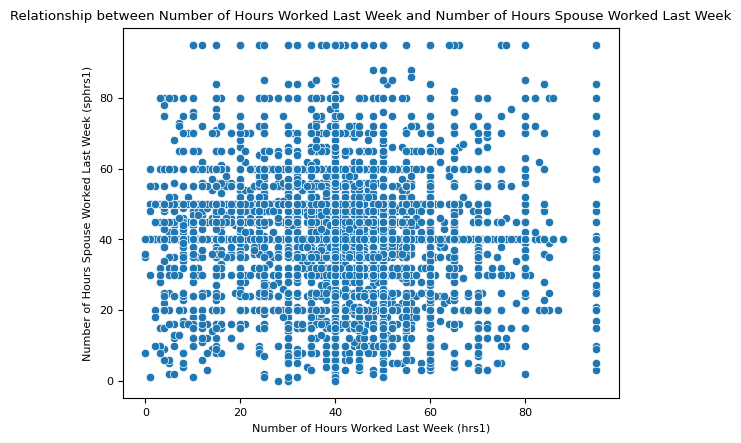

In [ ]:
sns.scatterplot(data = df_usable, x = 'hrs1', y='sphrs1')

plt.xlabel("Number of Hours Worked Last Week (hrs1)")
plt.ylabel("Number of Hours Spouse Worked Last Week (sphrs1)")

plt.title("Relationship between Number of Hours Worked Last Week and Number of Hours Spouse Worked Last Week")

plt.show()

#### **(2)**

The following chart illustrates the relationship between the number of hours worked last week and the number of hours a person’s spouse worked last week by divorce status. The chart presents a linear regression model utilizing two regression lines: an orange one displaying the trend for those who have been divorced, and a blue one displaying the trend for those who have not been divorced. A positive relationship is observed for the divorced group, indicating that the more hours a divorced participant works, the more hours their respective previous spouse typically worked. For the non divorced group, a negative relationship is observed, as the more hours a non-divorced participant worked, the less hours their respective spouse typically worked. It is calculated that the correlation coefficient for the divorced individuals is 0.098, while that of non divorced individuals is -0.025, revealing a particularly weak relationship between the two variables. However, although weak, these results still hint at the trend that non-divorced individuals work more than their respective spouses, while in contrast, under the divorced status, a slight positive trend is illustrated.

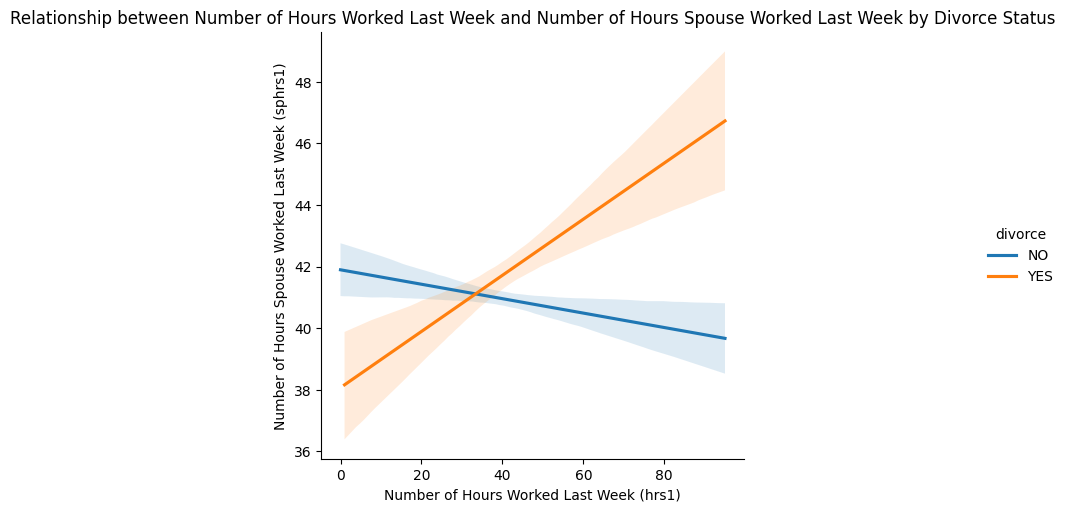

In [ ]:
sns.lmplot(data=df_usable, x="hrs1", y="sphrs1", hue = "divorce", scatter = False)

plt.xlabel("Number of Hours Worked Last Week (hrs1)")
plt.ylabel("Number of Hours Spouse Worked Last Week (sphrs1)")

plt.title("Relationship between Number of Hours Worked Last Week and Number of Hours Spouse Worked Last Week by Divorce Status")

plt.show()

In [ ]:
# Calculate correlation coefficients for above relationships
df_div = df_usable.loc[df_usable['divorce'] == 'YES']
df_no_div = df_usable.loc[df_usable['divorce'] == 'NO']
r, p = sp.stats.pearsonr(x=df_div['hrs1'], y=df_div['sphrs1']) # correlation for divorced
print(f"The correlation coefficient for the divorced individuals is {np.round(r,3)}.")
r, p = sp.stats.pearsonr(x=df_no_div['hrs1'], y=df_no_div['sphrs1']) # correlation for no divorce
print(f"The correlation coefficient for the non divorced individuals is {np.round(r,3)}.")

The correlation coefficient for the divorced individuals is 0.098.
The correlation coefficient for the non divorced individuals is -0.025.


#### **(3)**

The following graph illustrates the distribution of highest degree achieved grouped by marital status through a group bar chart. It is visible that for all marital statuses, “high school” is the most common level of education attained, with “less than high school” coming in second, and the other three groups displaying smaller populations. For the “less than high school” bars, widowed individuals appeared as the most frequently occurring marital status, with never married and divorced as the least frequent. For the “high school” bars, divorced individuals appeared as the most frequently occurring marital status, with widowed as the least frequent. For the “Associate/junior college” bars, divorced individuals appeared as the most frequently occurring marital status, with widowed as the least frequent. For the “Bachelor’s” bars , never married individuals appeared as the most frequently occurring marital status, with widowed as the least frequent. Lastly, for the “Graduate” bars, married individuals appeared as the most frequently occurring marital status, with separated as the least frequent. Such infrequencies in the mode for education levels make it difficult to establish a general trend among marital status.

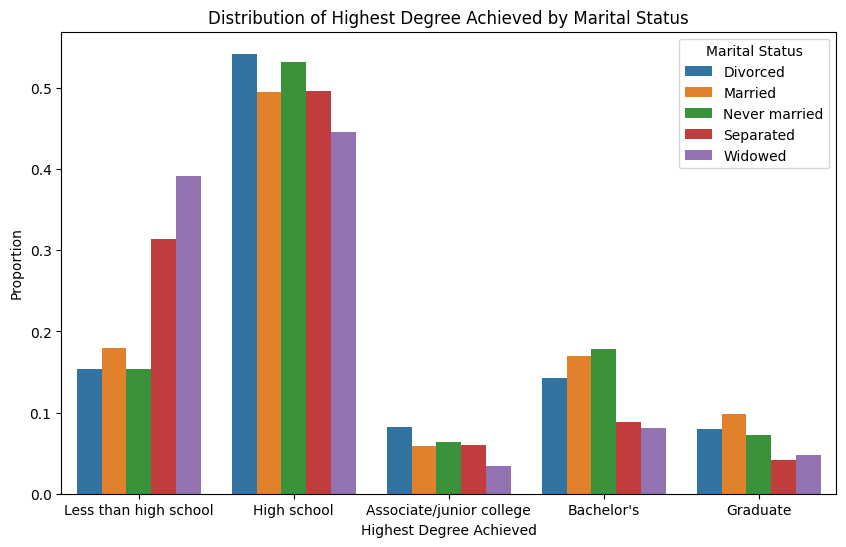

In [ ]:
# Establish order of highest degree achieved
degree_order = ["Less than high school", "High school", "Associate/junior college", "Bachelor's", "Graduate"]

# Establish relevant visualization variables
x, y, hue, order = "degree", "proportion", "marital", degree_order

# Set up plot size
plt.figure(figsize=(10, 6))

# Generate relevant plot
plot_data = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order = order))

# Set plot labels and title
plot_data.set(xlabel="Highest Degree Achieved", ylabel="Proportion", title="Distribution of Highest Degree Achieved by Marital Status")
plt.legend(title="Marital Status")

# Adjust formatting of plot
plt.rcParams.update({'font.size': 8})

plt.show()

#### **(4)**

The following graph illustrates the relationship between a participant’s number of hours worked last week and the highest degree achieved, grouped by marital status, through a grouped bar chart. For all levels of education achieved, widows appear to be working the least number of hours. Other marital status groups presented weekly working hours between roughly 39 and 44, with minimal differences between one another for all levels of education attained.

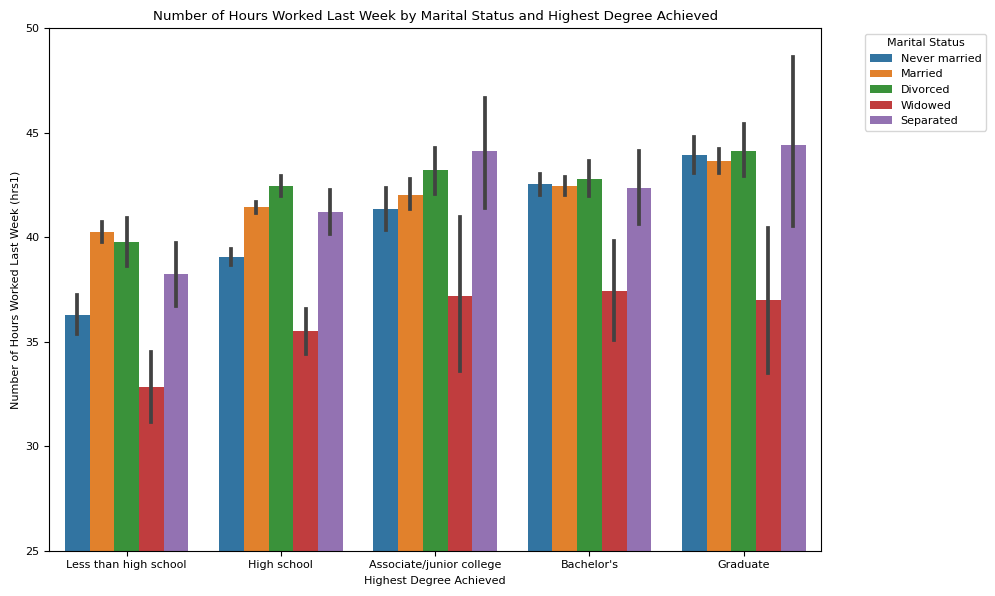

In [ ]:
# Establish order of highest degree achieved
degree_order = ["Less than high school", "High school", "Associate/junior college", "Bachelor's", "Graduate"]

# Set up plot size
plt.figure(figsize=(10, 6))

# Make bar plot with relevant married status data
sns.barplot(data = df, x = 'degree', y = 'hrs1', hue = 'marital', order=degree_order)

# Set plot labels and title
plt.title("Number of Hours Worked Last Week by Marital Status and Highest Degree Achieved")
plt.xlabel("Highest Degree Achieved")
plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust formatting of plot
plt.rcParams.update({'font.size': 8})
plt.tight_layout()
plt.ylim(25,50)

# Display plot
plt.show()

In [ ]:
# Mean hours worked for each group in above plot
var = 'hrs1'
group = ['degree','marital']
df.loc[:,['degree','marital',var]].groupby(group).mean()

hrs1
degree                   marital                 
Associate/junior college Divorced       43.205776
                         Married        42.045692
                         Never married  41.338356
                         Separated      44.123810
                         Widowed        37.203125
Bachelor's               Divorced       42.797044
                         Married        42.449685
                         Never married  42.535236
                         Separated      42.350649
                         Widowed        37.422078
Graduate                 Divorced       44.145648
                         Married        43.652157
                         Never married  43.959276
                         Separated      44.407895
                         Widowed        36.990196
High school              Divorced       42.453420
                         Married        41.429663
                         Never married  39.065510
                         Separated      41.212987
                         Widowed        35.535411
Less than high school    Divorced       39.784127
                         Married        40.242220
                         Never married  36.291667
                         Separated      38.241611
                         Widowed        32.822674

#### **(5)**

This plot presents the number of hours a spouse worked last week and the highest degree achieved for married individuals, though a bar chart. Based on the graph, it is clear that spouses with an “Associate/junior college” degree tend to work the most hours, with an average of roughly 42 weekly working hours. In contrast, spouses with a “Less than high school” level of education appear to work the least amount of hours weekly, with a mean of approximately 39. While such differences are visible through the bar plot, it is also important to consider that their mean difference is quite small, with only 3 hours of distinction.

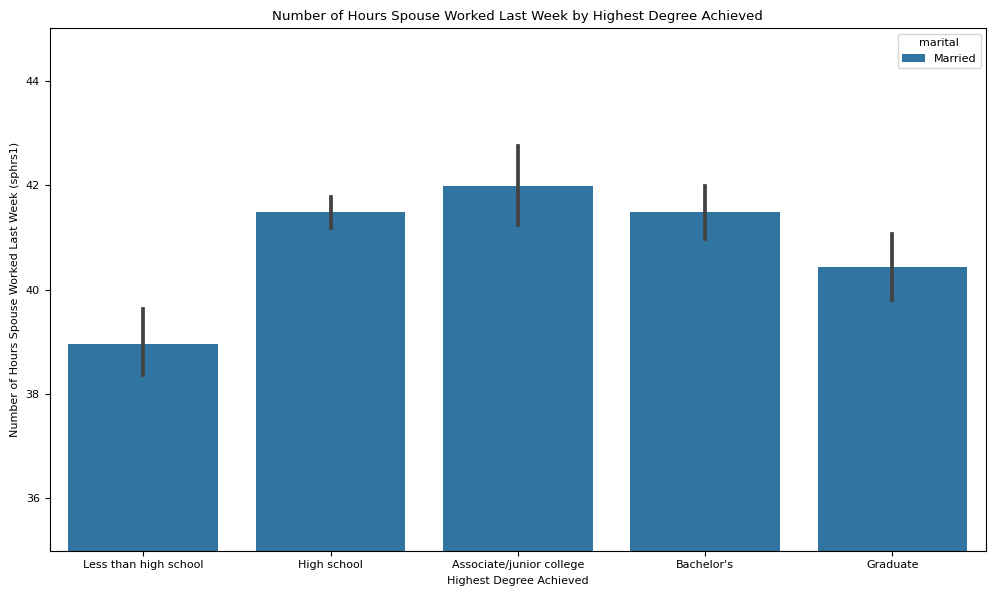

In [ ]:
# Establish order of highest degree achieved
degree_order = ["Less than high school", "High school", "Associate/junior college", "Bachelor's", "Graduate"]

# Set up plot size
plt.figure(figsize=(10, 6))

# Make bar plot with relevant married status data
sns.barplot(data = married_df, x = 'degree', y = 'sphrs1', hue = 'marital', order=degree_order)

# Set plot labels and title
plt.title("Number of Hours Spouse Worked Last Week by Highest Degree Achieved")
plt.xlabel("Highest Degree Achieved")
plt.ylabel("Number of Hours Spouse Worked Last Week (sphrs1)")

# Adjust formatting of plot
plt.rcParams.update({'font.size': 8})
plt.tight_layout()
plt.ylim(35,45)

# Display plot
plt.show()

In [ ]:
# Mean hours worked for each group in above plot
var = 'sphrs1'
group = 'degree'
married_df.loc[:,[group,var]].groupby(group).mean()

,sphrs1
degree,
Associate/junior college,41.986595
Bachelor's,41.481360
Graduate,40.425347
High school,41.476153
Less than high school,38.966066


#### **(6)**

The following chart is a kernel density plot for the number of hours worked last week, grouped by marital status. The graph reveals that all marital status groups roughly form a bell curve, each with one major peak, and highest density near their respective peaks. All of the marital status curves had a peak near 40 for hours worked last week, with “divorced/single” having a significantly lower density peak than the other curves. This subgroup's curve also appears to have a slightly negative skew, which is not present in any of the other curves.

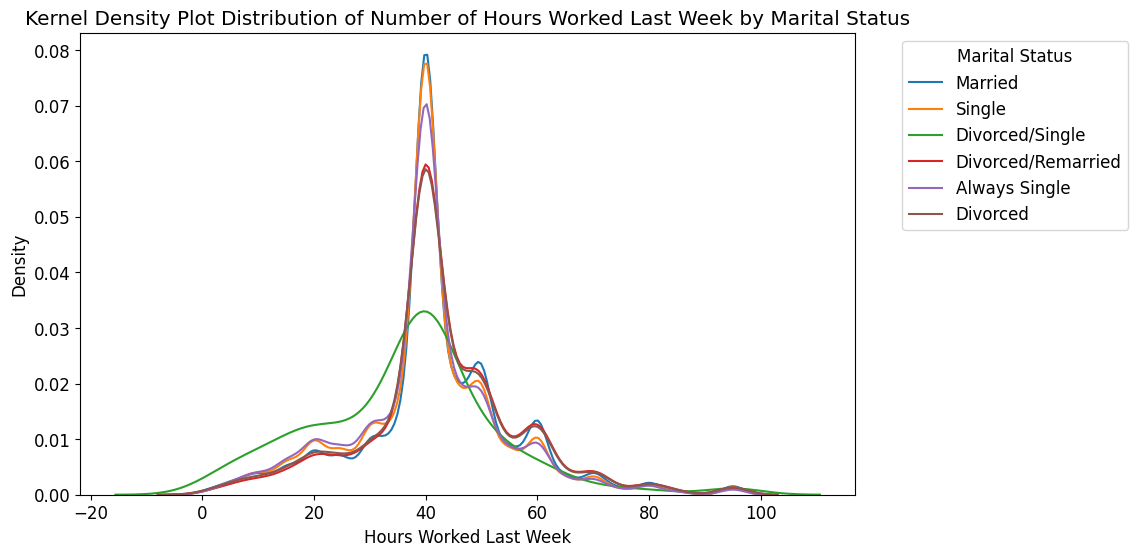

In [ ]:
# Set up plot size
plt.figure(figsize=(10, 6))

# Make kernel density plot with relevant marital status data
sns.kdeplot(data=married_df, x='hrs1', label='Married')
sns.kdeplot(data=single_df, x='hrs1', label='Single')
sns.kdeplot(data=divorced_single_df, x='hrs1', label='Divorced/Single')
sns.kdeplot(data=divorced_remarried_df, x='hrs1', label='Divorced/Remarried')
sns.kdeplot(data=always_single_df, x='hrs1', label='Always Single')
sns.kdeplot(data=divorced_df, x='hrs1', label='Divorced')

# Set plot labels and title
plt.xlabel("Hours Worked Last Week")
plt.ylabel("Density")
plt.title("Kernel Density Plot Distribution of Number of Hours Worked Last Week by Marital Status")

# Show plot legend
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.show()

#### **(7)**

The following chart is a histogram distribution of the number of hours worked last week, grouped by marital status. The graph reveals that all marital status groups have one major peak near 40 for hours worked last week. Additionally, it also highlights married individuals having the highest frequency near 40 weekly working hours compared to other groups, with divorce coming in second.

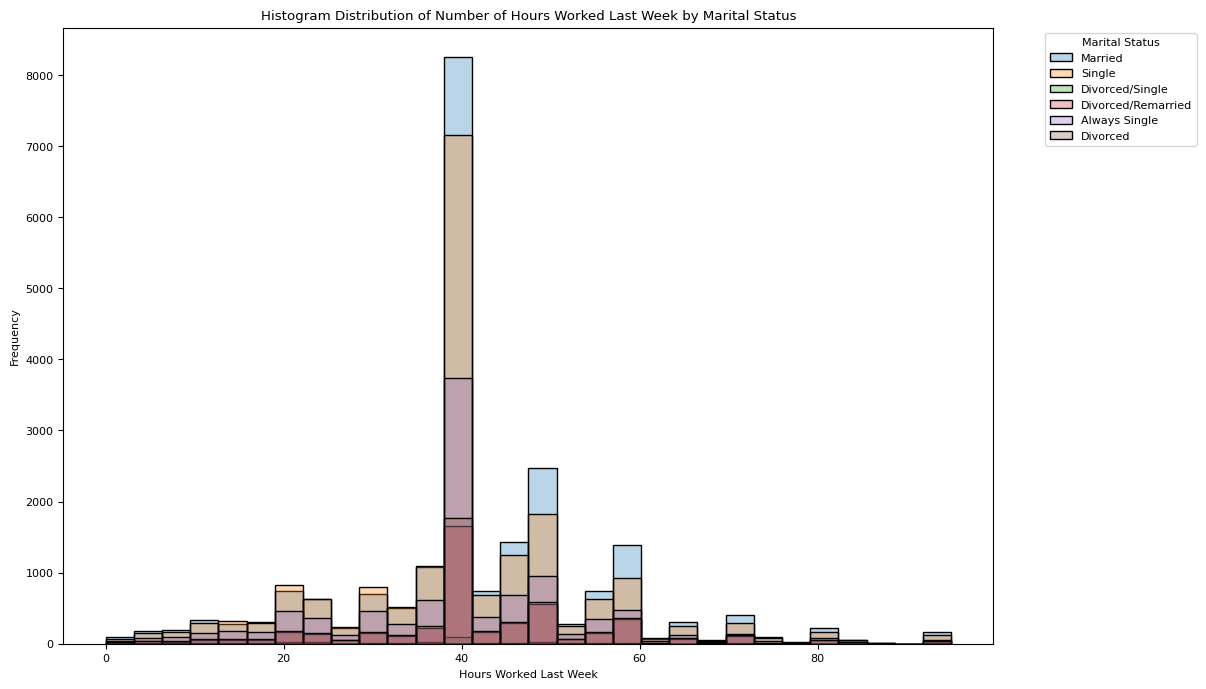

In [ ]:
# Set up plot size
plt.figure(figsize=(12, 8))

# Make histogram with relevant marital status data
sns.histplot(data=married_df, x='hrs1', label='Married', kde=False, bins=30, alpha=0.3)
sns.histplot(data=single_df, x='hrs1', label='Single', kde=False, bins=30, alpha=0.3)
sns.histplot(data=divorced_single_df, x='hrs1', label='Divorced/Single', kde=False, bins=30, alpha=0.3)
sns.histplot(data=divorced_remarried_df, x='hrs1', label='Divorced/Remarried', kde=False, bins=30, alpha=0.3)
sns.histplot(data=always_single_df, x='hrs1', label='Always Single', kde=False, bins=30, alpha=0.3)
sns.histplot(data=divorced_df, x='hrs1', label='Divorced', kde=False, bins=30, alpha=0.3)

# Set plot labels and title
plt.xlabel("Hours Worked Last Week")
plt.ylabel("Frequency")
plt.title("Histogram Distribution of Number of Hours Worked Last Week by Marital Status")

# Show plot legend
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.show()

#### **(8)**

The following graph compares work status density based on marital status, through a stacked bar chart. It is clear that among all marital statuses, full-time employment is the most common type of work status, as it contains by far the highest density among all working status groups. Additionally, it is also noted that the married marital status group tends to have significantly higher density across all work status groups. This portrays married and full-time as the most common status groups across marital status and work status, respectively.

Text(0.5, 1.0, 'Work Status by Marital Status')

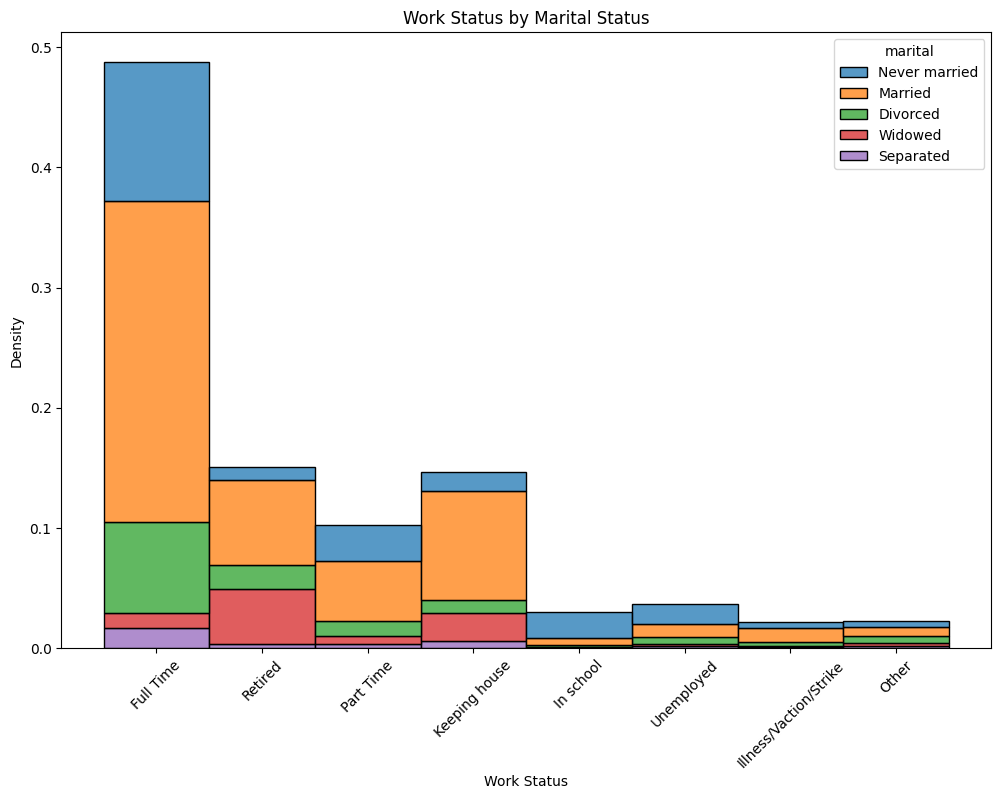

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='wrkstat', hue='marital', stat='density', multiple='stack')
plt.xticks(rotation=45)
plt.xlabel("Work Status")
plt.title("Work Status by Marital Status")

#### **(9)**

The following graph compares work status density to spouse's work status, through a stacked bar chart. The trend of full time employment being the most popular form of work status continues, as it is seen for both a participant’s work status as well as that of their respective spouse. This trend is observable across all participant work status bars.

Text(0.5, 1.0, "Work Status by Spouse's Work Status")

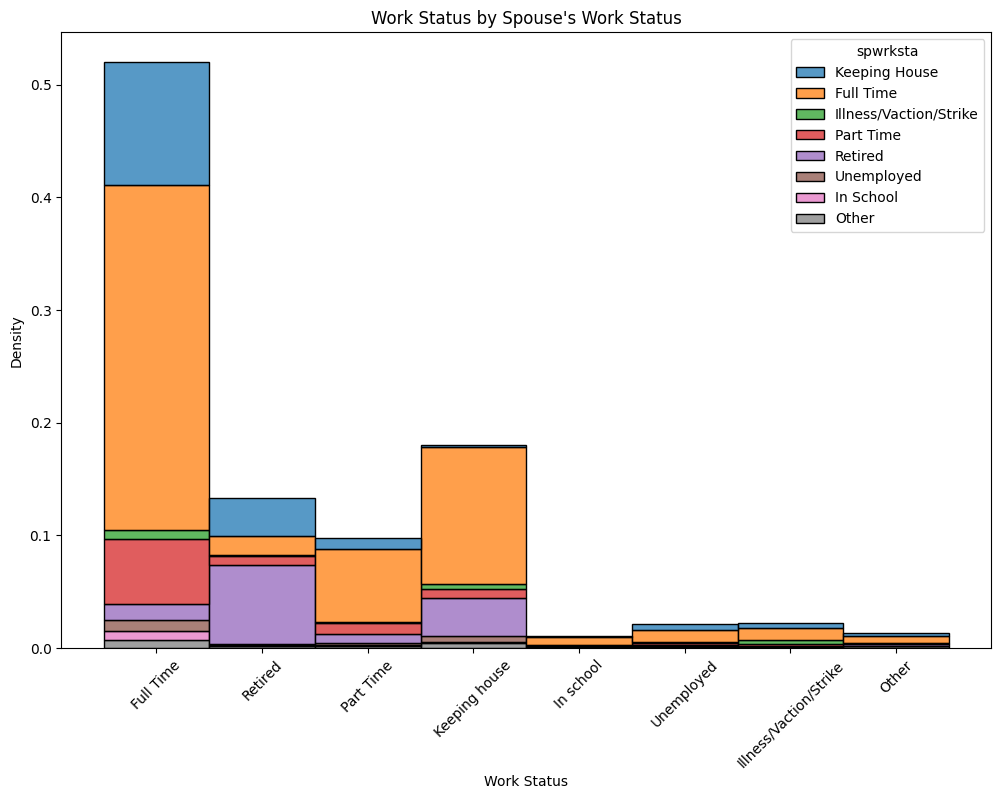

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='wrkstat', hue='spwrksta', stat='density', multiple='stack')
plt.xticks(rotation=45)
plt.xlabel("Work Status")
plt.title("Work Status by Spouse's Work Status")

#### **(10)**

The following graph compares the highest level of education achieved by a participant to that of their spouse, through a stacked bar chart. It highlights that, for the most part, people tend to marry those with their same level of education, with most of the density being under the high school bar.

Text(0.5, 1.0, "Degree by Spouse's degree")

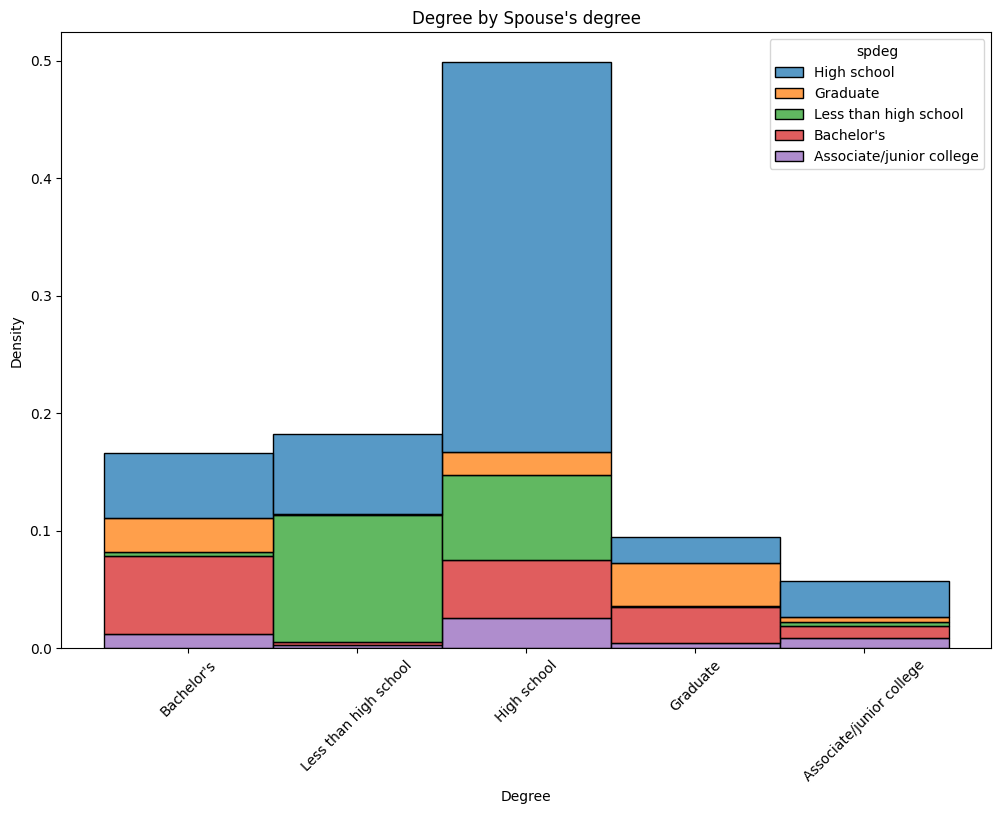

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='degree', hue='spdeg', stat='density', multiple='stack')
plt.xticks(rotation=45)
plt.xlabel("Degree")
plt.title("Degree by Spouse's degree")

## Conclusion

The aim of this project was to detect and visualize any potential trends between marital history and various factors pertaining to employment, particularly the number of hours worked in a given week. By selecting, cleaning and comparing several variables, we were able to identify areas of interest to investigate further. Following our initial data wrangling and summarizing, we decided to pursue a few potential relationships. We first looked at the number of hours worked last week versus the number of hours a spouse worked last week grouped by divorce status and found an interesting result. For individuals who have been divorced, there was a weak positive relationship between the number of hours worked last week and the number of hours their spouse worked last week; however, for individuals who have not been divorced, there was no trend at all. The correlation coefficients were both almost negligible, however. We then incorporated more variables into our subsequent analysis; these included highest degree achieved and work status. An interesting finding from the kernel density plot was the difference between the distribution of hours worked last week for individuals who have been divorced and remain single and the distributions for all other subgroups; the divorced/single group’s distribution has a slight negative skew, which is not found in any of the other groups. Upon visualizing highest degree achieved, we also found that people tend to marry individuals with their same level of education.

It is important to note that the topic we selected is highly nuanced and cannot possibly be comprehensively explained without further analyses. There are countless factors that influence marital status/history, hours worked per week, work status, and highest degree achieved; thus, we recognize that our work here merely scratches the surface of some very complex sociological trends and phenomena. We also acknowledge that our work does not demonstrate causality for any of the relationships explored. However, our work does provide a solid framework for further research into these relationships. For example, it could be worthwhile to examine whether the weak trend we found in our line plot is evident in other datasets from different populations. If this trend were to be found in other datasets, it would then be pertinent to ask why, and there are a multitude of directions the project could then be taken in. Moreover, we also recognize that, given the complexity of some of the variables we chose, some of our visualizations regarding highest degree achieved and work status may appear too “busy” at first glance; they are, ultimately, conveying a lot of information that may be difficult to digest. However, one of our goals in producing these plots was to capture some of the aforementioned nuance inherent in social data to create an exhaustive view of the relevant variables, and in order to do that we needed to preserve as much detail from people’s responses to the survey as possible. Thus, we could not justifiably eliminate categories of responses in order to simplify our visualizations. Given that our project was exploratory and that we wanted to search for potential trends among multiple variables, these visualizations make sense. With that being said, additional work would definitely include narrowing the scope of these visuals to focus on one or a few aspects of particular interest in order to improve digestibility and ease of interpretation. Our visuals provide broad views of the topics at hand, and if time had allowed for it, our next steps would certainly have included producing follow-up visualizations highlighting specific features of our prior plots.

In conclusion, our analyses indicate that there may be relationships between marital status and various factors pertaining to employment, but numerically the evidence is weak and ultimately inconclusive. Next steps would include conducting statistical tests to determine significance of findings and producing additional visualizations to aid in interpretation of the ones presented.

## References

Olson, R. (2015, June 15). 144 years of marriage and divorce in 1 chart. Dr. Randal S. Olson. randalolson.com

## Appendix

#### Figure 1. Number Hours Worked by Married Individuals.

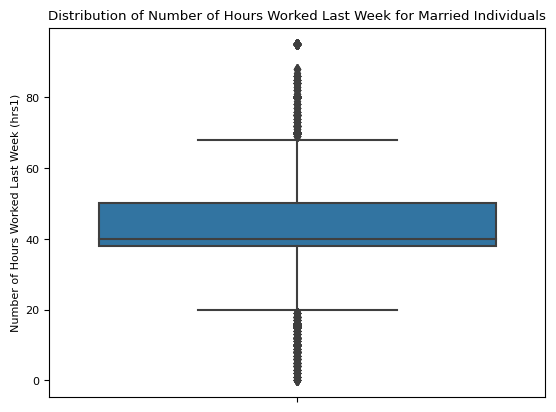

In [ ]:
sns.boxplot(data=married_df, y='hrs1')

plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.title("Distribution of Number of Hours Worked Last Week for Married Individuals")

plt.show()

In [ ]:
# Corresponding summary statistics for above visualization
married_df['hrs1'].describe()

count    21951.000000
mean        41.789486
std         14.340335
min          0.000000
25%         38.000000
50%         40.000000
75%         50.000000
max         95.000000
Name: hrs1, dtype: float64

The distribution of the number of hours worked in the previous week for someone who is married is displayed through a boxplot on this chart. The graph indicates that married individuals have a median average of weekly working hours of approximately 40, with 50% of married individuals working between roughly 38 and 50 hours a week, seeing an overall range variation of about 50 weekly hours, excluding outliers.

#### Figure 2. Number Hours Worked by Single Individuals.

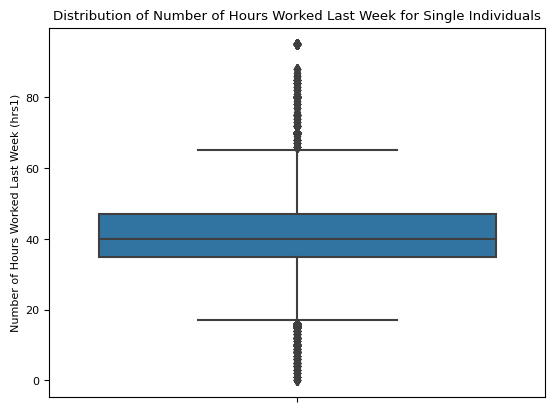

In [ ]:
sns.boxplot(data=single_df, y="hrs1")

plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.title("Distribution of Number of Hours Worked Last Week for Single Individuals")

plt.show()

In [ ]:
# Corresponding summary statistics for above visualization
single_df['hrs1'].describe()

count    19234.000000
mean        40.607778
std         14.191673
min          0.000000
25%         35.000000
50%         40.000000
75%         47.000000
max         95.000000
Name: hrs1, dtype: float64

The distribution of the number of hours worked in the previous week for someone who is single is displayed through a boxplot on this chart. The graph indicates that single individuals have a median average of weekly working hours of approximately 40, with 50% of single folks working between roughly 35 and 47 hours a week, seeing an overall range variation of about 47 weekly hours, excluding outliers.

#### Figure 3. Number Hours Worked by Previously Divorced (and Single) Individuals.

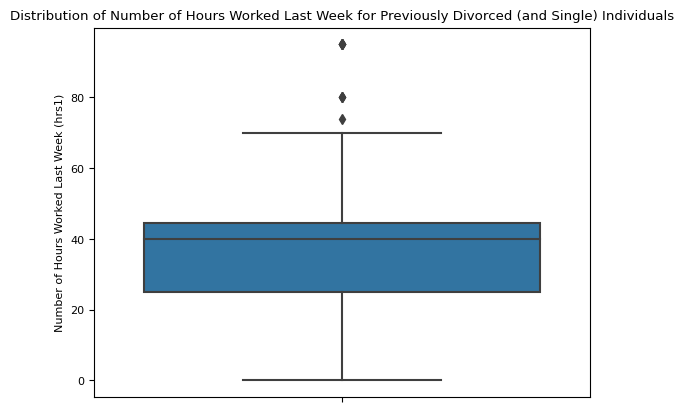

In [ ]:
sns.boxplot(data=divorced_single_df, y="hrs1")

plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.title("Distribution of Number of Hours Worked Last Week for Previously Divorced (and Single) Individuals")

plt.show()

In [ ]:
# Corresponding summary statistics for above visualization
divorced_single_df['hrs1'].describe()

count    343.000000
mean      36.670554
std       16.704674
min        0.000000
25%       25.000000
50%       40.000000
75%       44.500000
max       95.000000
Name: hrs1, dtype: float64

The distribution of the number of hours worked in the previous week for those who are previously divorced and single is displayed through a boxplot on this chart. The graph indicates that these individuals have a median average of weekly working hours of approximately 40, with 50% of these folks working between roughly 25 and 44 hours a week, seeing an overall range variation of about 70 weekly hours, excluding outliers.

#### Figure 4. Number Hours Worked by Always Single Individuals.

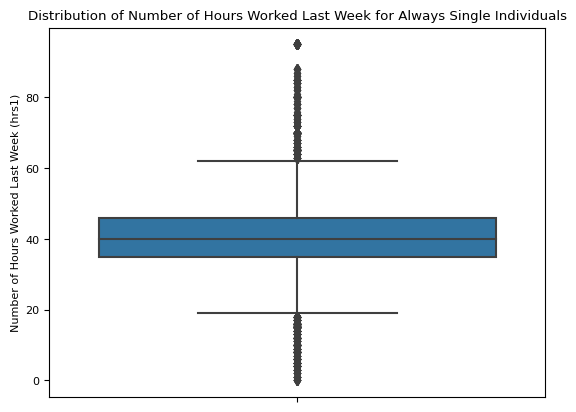

In [ ]:
sns.boxplot(data=always_single_df, y='hrs1')

plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.title("Distribution of Number of Hours Worked Last Week for Always Single Individuals")

plt.show()

In [ ]:
# Corresponding summary statistics for above visualization
always_single_df['hrs1'].describe()

count    10275.000000
mean        40.140925
std         13.975060
min          0.000000
25%         35.000000
50%         40.000000
75%         46.000000
max         95.000000
Name: hrs1, dtype: float64

The distribution of the number of hours worked in the previous week for those who have always been single is displayed through a boxplot on this chart. The graph indicates that these individuals have a median average of weekly working hours of approximately 40, with 50% of these folks working between roughly 35 and 46 hours a week, seeing an overall range variation of about 43 weekly hours, excluding outliers.

#### Figure 5. Number Hours Worked by Previously Divorced (and Remarried) Individuals.

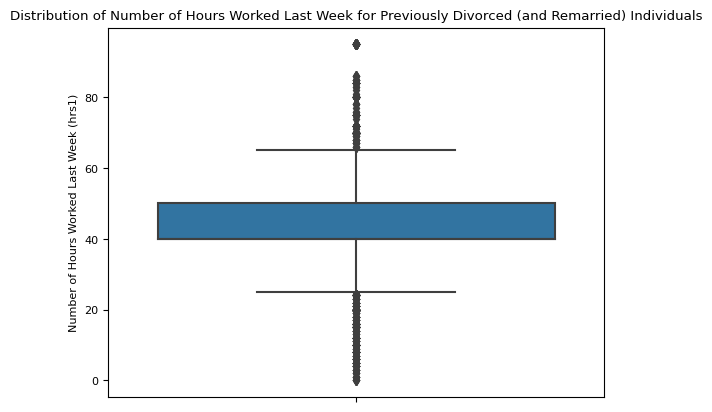

In [ ]:
sns.boxplot(data=divorced_remarried_df, y='hrs1')

plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.title("Distribution of Number of Hours Worked Last Week for Previously Divorced (and Remarried) Individuals")

plt.show()

In [ ]:
# Corresponding summary statistics for above visualization
divorced_remarried_df['hrs1'].describe()

count    4650.000000
mean       42.740860
std        14.467539
min         0.000000
25%        40.000000
50%        40.000000
75%        50.000000
max        95.000000
Name: hrs1, dtype: float64

The distribution of the number of hours worked in the previous week for those who have been previously divorced and have remarried is displayed through a boxplot on this chart. The graph indicates that these individuals have a median average of weekly working hours of approximately 40, with 50% of these folks working between roughly 40 and 50 hours a week, seeing an overall range variation of about 41 weekly hours, excluding outliers.

#### Figure 6. Number Hours Worked by Divorced Individuals.

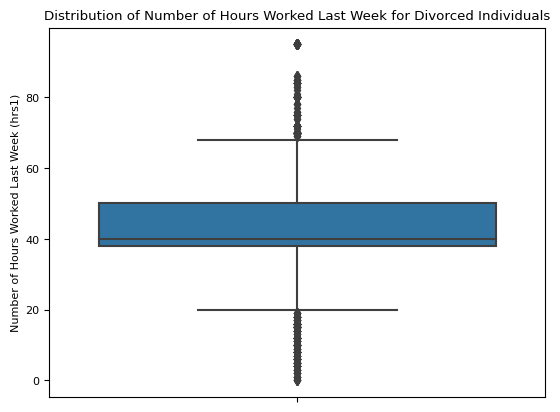

In [ ]:
sns.boxplot(data=divorced_df, y='hrs1')

plt.ylabel("Number of Hours Worked Last Week (hrs1)")
plt.title("Distribution of Number of Hours Worked Last Week for Divorced Individuals")

plt.show()

In [ ]:
# Corresponding summary statistics for above visualization
divorced_df['hrs1'].describe()

count    4993.000000
mean       42.323853
std        14.710653
min         0.000000
25%        38.000000
50%        40.000000
75%        50.000000
max        95.000000
Name: hrs1, dtype: float64

The distribution of the number of hours worked in the previous week for someone who is divorced is displayed through a boxplot on this chart. The graph indicates that divorced individuals have a median average of weekly working hours of approximately 40, with 50% of these folks working between roughly 38 and 50 hours a week, seeing an overall range variation of about 48 weekly hours, excluding outliers.